In [1]:
import bpy
bpy.context.scene.render.engine = 'CYCLES'
import numpy as np
import matplotlib.pyplot as plt
from set_Swirski_config import set_Swirski_config
from enable_gpus import enable_gpus

In [2]:
filepath = "./Swirski_EyeModel.blend"
bpy.ops.wm.open_mainfile(filepath=filepath)

{'FINISHED'}

In [3]:
#Enable GPU rendering
gpus = enable_gpus("CUDA")
print(gpus)

['Quadro RTX 8000', 'Quadro RTX 8000', 'Quadro RTX 8000']


In [4]:
#This is a trick to enable saving the render to RAM
scene = bpy.context.scene
scene.use_nodes = True
tree = scene.node_tree
links = tree.links

# create input render layer node
rl = tree.nodes.new('CompositorNodeRLayers')    

# create output node
v = tree.nodes.new('CompositorNodeViewer')   
v.use_alpha = False

links.new(rl.outputs[0], v.inputs[0]) 

bpy.data.scenes['model/rigging'].node_tree

In [5]:
#Set scene parameters 
input_eye_closedness = 0
pattern_path =  "./496-free-hdri-skies-com.jpg"
elev = 10
azim = 10
set_Swirski_config(elev, azim, input_eye_closedness, pattern_path)


In [6]:
#render the scene 
bpy.ops.render.render()


{'FINISHED'}

In [7]:
#Save the render as an RGBA array
pixels = bpy.data.images['Viewer Node'].pixels
print(pixels)
print(scene.render.resolution_x)
print(scene.render.resolution_y )
pixels = np.array(pixels[:]).reshape(scene.render.resolution_y , scene.render.resolution_x, 4)[::-1,:,:]

<bpy_float[262144], Image.pixels>
256
256


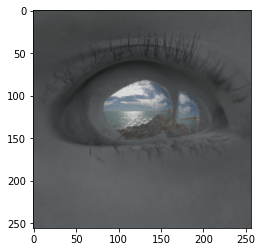

In [8]:
#display results
plt.imshow(np.power(pixels, 1/2.2))
plt.show()

In [9]:
def render_eye_with_config(elev, azim, input_eye_closedness, pattern_path, sRGB = True, alpha = False):
    set_Swirski_config(elev, azim, input_eye_closedness, pattern_path)
    bpy.ops.render.render()
    pixels = bpy.data.images['Viewer Node'].pixels
    pixels = np.array(pixels[:]).reshape(scene.render.resolution_y , scene.render.resolution_x, 4)[::-1,:,:]
    if not alpha:
        pixels = pixels[:,:,:3]
    if sRGB:
        pixels = np.power(pixels, 1/2.2)
    return pixels

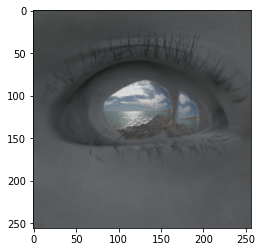

In [21]:
pixels  = render_eye_with_config(elev, azim, input_eye_closedness, pattern_path, sRGB = True, alpha = False)
#display results
plt.imshow(pixels)
plt.show()

In [20]:
mat = bpy.data.materials.get("Sclera_Diff")
outer_eye = bpy.data.collections["Collection 1"].objects['eye-outer']
outer_eye.data.materials[0] = mat


In [24]:
camera_axis = outer_eye = bpy.data.objects['Camera_Axis']
from mathutils import Euler
camera_axis.rotation_euler = Euler((0, 0, 30/180 * np.pi), 'XYZ')

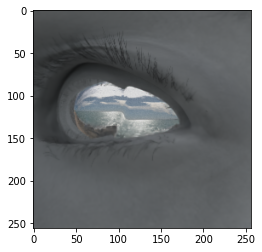

In [25]:
pixels  = render_eye_with_config(elev, azim, input_eye_closedness, pattern_path, sRGB = True, alpha = False)
#display results
plt.imshow(pixels)
plt.show()